In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision=10, suppress=True)

# font = {'size'   : 22}

# mpl.rc('font', **font)
# mpl.rc('xtick', labelsize=20) 
# mpl.rc('ytick', labelsize=20) 

mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'font.family': 'Arial'})

FONT_BG = 25

mpl.rcParams['pdf.fonttype'] = 42 # allow text of pdf to be edited in illustrator

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

In [2]:
d = np.load('./Data/carey/carey_session_data.npz', allow_pickle=True)

In [3]:
posto = d['posto']
choices = d['choices']
state_traj = d['state_trajs']
rewards = d['rewards']
sess_seq = d['sess_seq']
posto_Gs = d['posto_Gs']

num_arms = 2
arm_length = 2
start_to_choice = 2
goal_states = start_to_choice + np.arange(num_arms) * arm_length + (arm_length - 1)

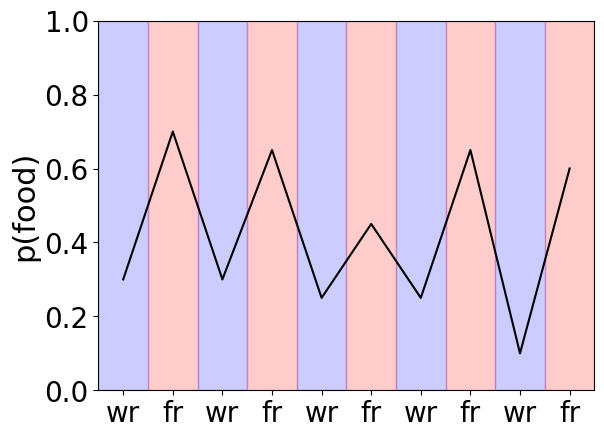

In [4]:
# Check behaviour per day
num_sessions = len(sess_seq)
behav_p_food = np.zeros(num_sessions)

for i in range(num_sessions):
    sess_choices = choices[i]
    behav_p_food[i] = np.sum(sess_choices) / len(sess_choices)

plt.figure()
plt.plot(behav_p_food, color='k')
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food)')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)

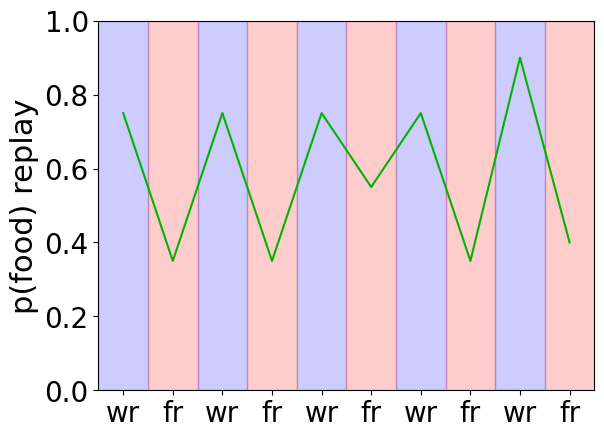

In [5]:
# Check proportion of replays that are food over time
num_sessions = choices.shape[0]
num_trials = choices.shape[1]
replay_p_food = np.zeros(num_sessions)

for session in range(num_sessions):
    for trial in range(num_trials):
        trial_replay = posto[session, trial]
        if goal_states[1] in trial_replay or goal_states[1] - 1 in trial_replay:
            replay_p_food[session] += 1
    
replay_p_food /= num_trials

plt.figure()
plt.plot(replay_p_food, color=(0, 0.7, 0))
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food) replay')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)

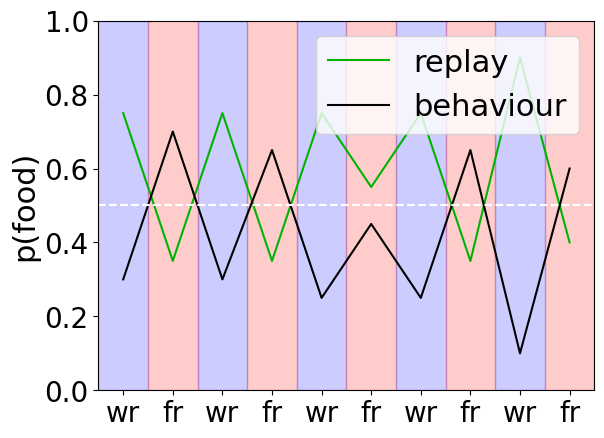

In [6]:
# Plot them both
plt.figure()
plt.plot(replay_p_food, color=(0, 0.7, 0), label='replay')
plt.plot(behav_p_food, color='k', label='behaviour')
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food)')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)

plt.axhline(0.5, color='white', linestyle='--')

plt.legend()

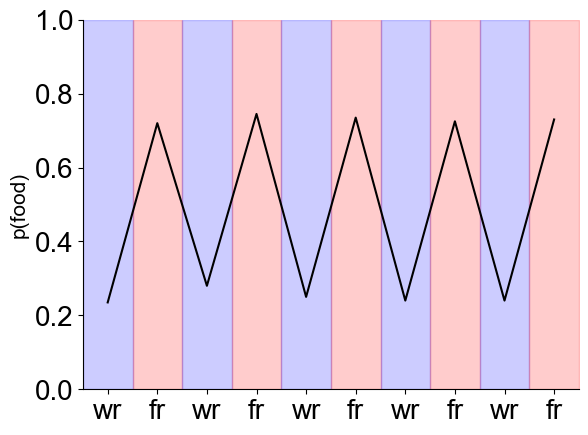

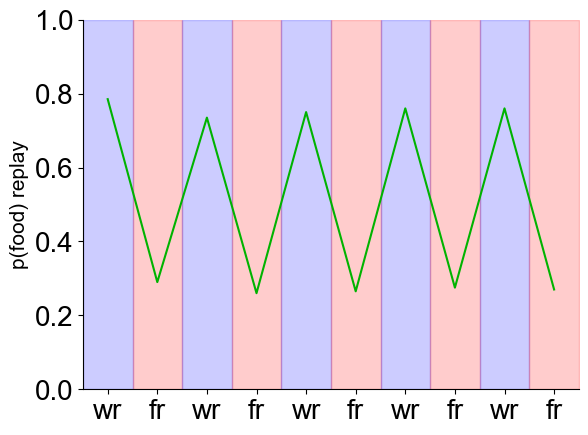

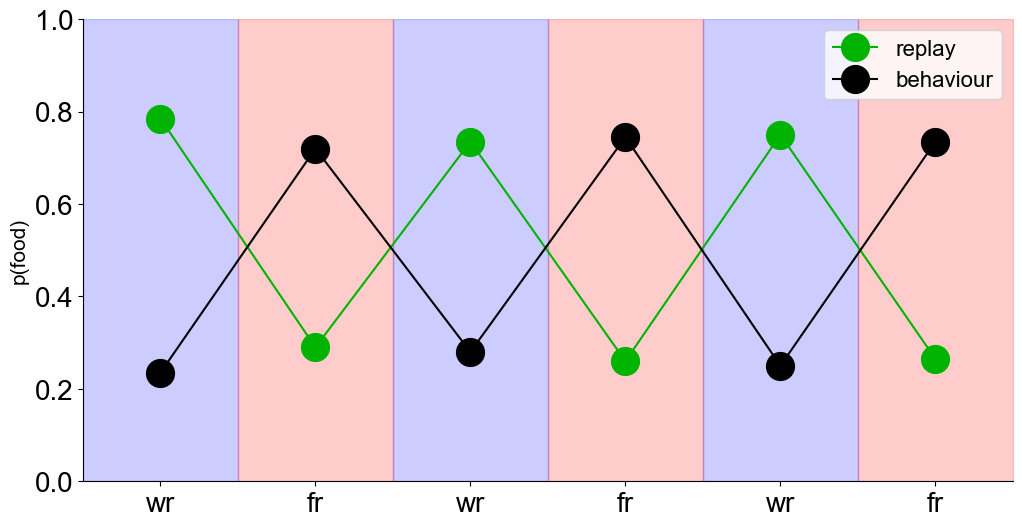

In [9]:
d = np.load('./Data/carey/carey_mouse_data.npz', allow_pickle=True)

posto = d['posto']
choices = d['choices']
state_traj = d['state_trajs']
rewards = d['rewards']
sess_seq = d['sess_seq']
posto_Gs = d['posto_Gs']

num_arms = 2
arm_length = 2
start_to_choice = 2
goal_states = start_to_choice + np.arange(num_arms) * arm_length + (arm_length - 1)

## Check behaviour per day
num_mice = choices.shape[0]
num_sessions = choices.shape[1]
num_trials = choices.shape[2]

behav_p_food = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):

    for i in range(num_sessions):
        sess_choices = choices[mouse, i]
        behav_p_food[mouse, i] = np.sum(sess_choices) / len(sess_choices)

plt.figure()
plt.plot(np.mean(behav_p_food, axis=0), color='k')
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food)')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)
        
## Check proportion of replays that are food over time
replay_p_food = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):
    for session in range(num_sessions):
        for trial in range(num_trials):
            trial_replay = posto[mouse, session, trial]
            if goal_states[1] in trial_replay or goal_states[1] - 1 in trial_replay:
                replay_p_food[mouse, session] += 1
    
replay_p_food /= num_trials

plt.figure()
plt.plot(np.mean(replay_p_food, axis=0), color=(0, 0.7, 0))
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food) replay')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)
        
## Plot them both
num_sessions = 6
plt.figure(figsize=(12, 6))
plt.plot(np.mean(replay_p_food, axis=0)[:num_sessions], color=(0, 0.7, 0), label='replay', marker='o', markersize=20)
plt.plot(np.mean(behav_p_food, axis=0)[:num_sessions], color='k', label='behaviour', marker='o', markersize=20)
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food)')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)

# plt.axhline(0.5, color='white', linestyle='--')

plt.legend(prop={'size': 16})
plt.savefig('./figs/fig4/fig4_model.pdf', transparent=True)

In [8]:
c = choices[1]
r = posto[1]

In [9]:
c.shape

(10, 20)

In [10]:
c[0, :10]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
r.shape

(10, 20, 3, 3)

In [12]:
r[0, :10]

array([[[1., 2., 2.],
        [0., 1., 1.],
        [4., 1., 5.]],

       [[0., 1., 1.],
        [1., 3., 4.],
        [2., 1., 3.]],

       [[4., 1., 5.],
        [1., 3., 4.],
        [0., 1., 1.]],

       [[4., 1., 5.],
        [1., 3., 4.],
        [0., 1., 1.]],

       [[4., 1., 5.],
        [1., 3., 4.],
        [0., 1., 1.]],

       [[4., 1., 5.],
        [1., 3., 4.],
        [0., 1., 1.]],

       [[1., 2., 2.],
        [0., 1., 1.],
        [4., 1., 5.]],

       [[1., 2., 2.],
        [0., 1., 1.],
        [4., 1., 5.]],

       [[1., 2., 2.],
        [0., 1., 1.],
        [4., 1., 5.]],

       [[1., 2., 2.],
        [0., 1., 1.],
        [1., 3., 4.]]])

In [3]:
d = np.load('./Data/carey/carey_mattar_mouse_data.npz', allow_pickle=True)

In [ ]:
posto = d['posto']
# filter reward term from replays
posto = posto[:, :, :]
choices = d['choices']
state_traj = d['state_trajs']
rewards = d['rewards']
sess_seq = d['sess_seq']
posto_Gs = d['posto_Gs']

num_arms = 2
arm_length = 2
start_to_choice = 2
goal_states = start_to_choice + np.arange(num_arms) * arm_length + (arm_length - 1)

## Check behaviour per day
num_mice = choices.shape[0]
num_sessions = choices.shape[1]
num_trials = choices.shape[2]

behav_p_food = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):

    for i in range(num_sessions):
        sess_choices = choices[mouse, i]
        behav_p_food[mouse, i] = np.sum(sess_choices) / len(sess_choices)

plt.figure()
plt.plot(np.mean(behav_p_food, axis=0), color='k')
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food)')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)
        
## Check proportion of replays that are food over time
replay_p_food = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):
    for session in range(num_sessions):
        for trial in range(num_trials):
            trial_replay = posto[mouse, session, trial]
            if goal_states[1] in trial_replay or goal_states[1] - 1 in trial_replay:
                replay_p_food[mouse, session] += 1
    
replay_p_food /= num_trials

plt.figure()
plt.plot(np.mean(replay_p_food, axis=0), color=(0, 0.7, 0))
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food) replay')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)
        
## Plot them both
num_sessions = 6
plt.figure(figsize=(12, 6))
plt.plot(np.mean(replay_p_food, axis=0)[:num_sessions], color=(0, 0.7, 0), label='replay', marker='o', markersize=20)
plt.plot(np.mean(behav_p_food, axis=0)[:num_sessions], color='k', label='behaviour', marker='o', markersize=20)
plt.ylim(0, 1)
xlabels = ['wr' if i % 2 == 0 else 'fr' for i in range(num_sessions)]
plt.xticks(np.arange(num_sessions), xlabels)
plt.ylabel('p(food)')
plt.xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='blue', alpha=0.2)
    else:
        plt.fill_between([i - 0.5, i + 0.5], [1.0, 1.0], [0.0, 0.0], color='red', alpha=0.2)

# plt.axhline(0.5, color='white', linestyle='--')

plt.legend(prop={'size': 16})
plt.savefig('./figs/fig4/fig4_model.pdf', transparent=True)